# Image opening for elongated objects

In this notebook we will see how to use image opening for binary masks to remove not elongated objects and keep elongated ones.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import cv2
from PIL import Image
import os
import pandas as pd
import plotly.express as px

import scipy.ndimage as ndi


# Function

## Function to load the images

In [2]:
def data_load(path, resize=True, size=(32,32)):
    """Function to load the images from a given path
    Parameters
    ----------
    path : str
        Path to the images
    Returns
    -------
    imgs : list
        List of images

    """
    imgs = []
    for filename in os.listdir(path):
        if filename.endswith('.png') or filename.endswith('.jpg'):
            file_path = os.path.join(path,filename)
            img = Image.open(file_path)
            if resize:
                img = img.resize(size)
            if img is not None:
                imgs.append(img)
    return imgs

# Experiment

In [7]:
# load multiple images into a list
path = '../elongacao_de_objetos/imagens/'
imgs = data_load(path, resize=False, size=(128,128))

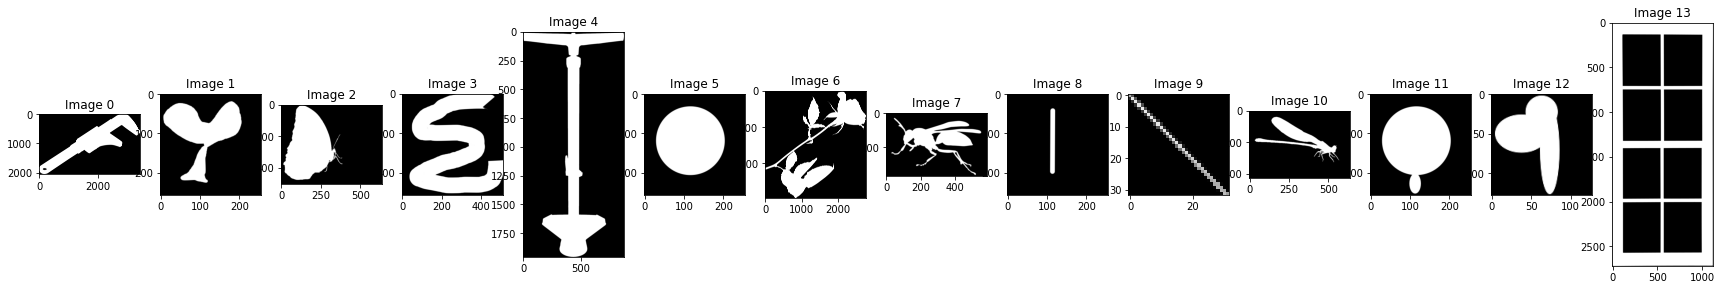

In [8]:
plt.figure(figsize=(30, 12))
for idx, img in enumerate(imgs):
   plt.subplot(2, len(imgs), idx+1)
   plt.imshow(img, cmap='gray')
   plt.title(f"Image {idx}")

## Using image opening to remove not elongated objects

Text(0.5, 1.0, 'Image after difference')

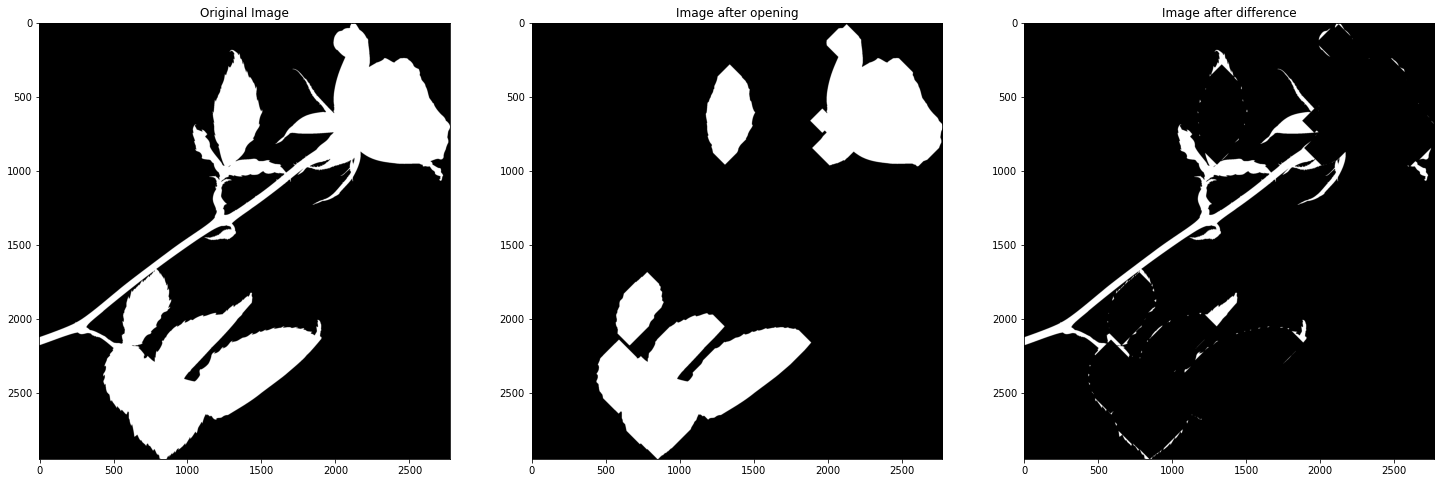

In [9]:
img_bin = imgs[6]
img_bin = np.array(img_bin) > 0 # Binary image
d = 80
img_open = ndi.binary_opening(img_bin, iterations=d)
img_diff =  img_bin*1 - img_open*1 # Convert to int
img_label = ndi.label(img_diff)
# areas, n = ndi.sum(img_label)

plt.figure(figsize=(25, 12))

plt.subplot(1, 3, 1)
plt.imshow(img_bin, cmap='gray')
plt.title(f"Original Image")

plt.subplot(1, 3, 2)
plt.imshow(img_open, cmap='gray')
plt.title(f"Image after opening")

plt.subplot(1, 3, 3)
plt.imshow(img_diff, cmap='gray')
plt.title(f"Image after difference")



(array([6.377203e+06, 0.000000e+00, 0.000000e+00, 9.050000e+02,
        0.000000e+00, 0.000000e+00, 7.550000e+02, 0.000000e+00,
        0.000000e+00, 6.610000e+02, 0.000000e+00, 0.000000e+00,
        5.280000e+02, 0.000000e+00, 0.000000e+00, 4.460000e+02,
        0.000000e+00, 0.000000e+00, 4.550000e+02, 0.000000e+00,
        0.000000e+00, 4.310000e+02, 0.000000e+00, 0.000000e+00,
        3.760000e+02, 0.000000e+00, 0.000000e+00, 4.620000e+02,
        0.000000e+00, 0.000000e+00, 4.050000e+02, 0.000000e+00,
        0.000000e+00, 3.230000e+02, 0.000000e+00, 0.000000e+00,
        4.000000e+02, 0.000000e+00, 0.000000e+00, 2.960000e+02,
        0.000000e+00, 0.000000e+00, 2.870000e+02, 0.000000e+00,
        0.000000e+00, 3.960000e+02, 0.000000e+00, 0.000000e+00,
        2.860000e+02, 0.000000e+00, 0.000000e+00, 4.870000e+02,
        0.000000e+00, 0.000000e+00, 3.090000e+02, 0.000000e+00,
        0.000000e+00, 2.510000e+02, 0.000000e+00, 0.000000e+00,
        3.290000e+02, 0.000000e+00, 0.00

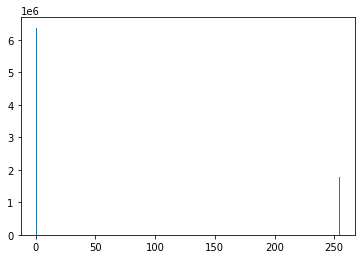

In [166]:
plt.hist(np.array(img_bin).flatten(), bins=255)

In [174]:
np.unique(img_open, return_counts=True)

(array([False,  True]), array([6566901, 1605130]))

In [161]:
np.bincount(np.array(img_bin).flatten())
# plt.hist(np.array(img_bin).flatten(), bins=255)

array([6377203,       0,       0,     905,       0,       0,     755,
             0,       0,     661,       0,       0,     528,       0,
             0,     446,       0,       0,     455,       0,       0,
           431,       0,       0,     376,       0,       0,     462,
             0,       0,     405,       0,       0,     323,       0,
             0,     400,       0,       0,     296,       0,       0,
           287,       0,       0,     396,       0,       0,     286,
             0,       0,     487,       0,       0,     309,       0,
             0,     251,       0,       0,     329,       0,       0,
           304,       0,       0,     280,       0,       0,     229,
             0,       0,     288,       0,       0,     321,       0,
             0,     300,       0,       0,     268,       0,       0,
           239,       0,       0,     189,       0,       0,     371,
             0,       0,     186,       0,       0,     242,       0,
             0,     

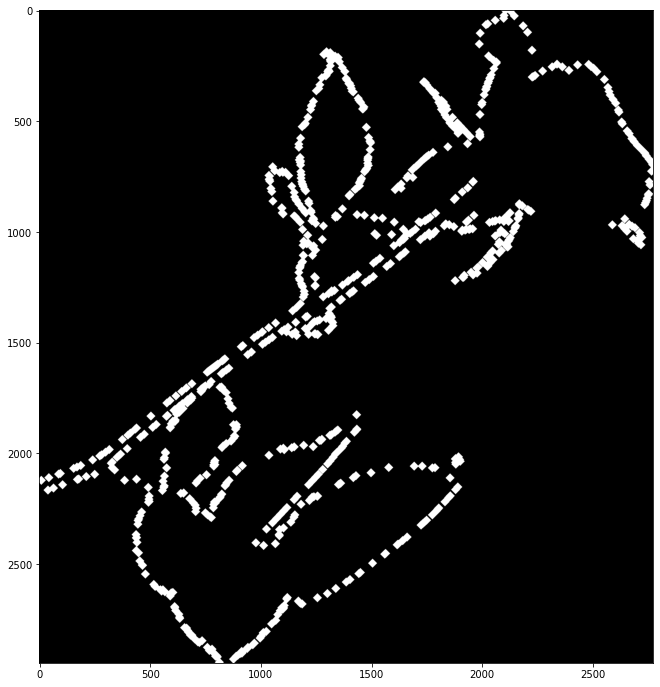

In [165]:
plt.figure(figsize=(25, 12))
plt.imshow(ndi.binary_dilation(np.array(img_bin) == 3, iterations=20), cmap='gray')

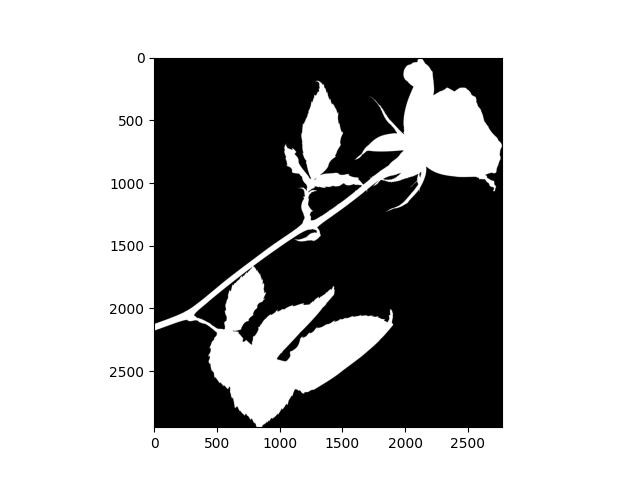

In [171]:
%matplotlib widget

plt.imshow(img_bin, cmap='gray')
plt.show()

## Using distance transform

Text(0.5, 1.0, 'Final Image')

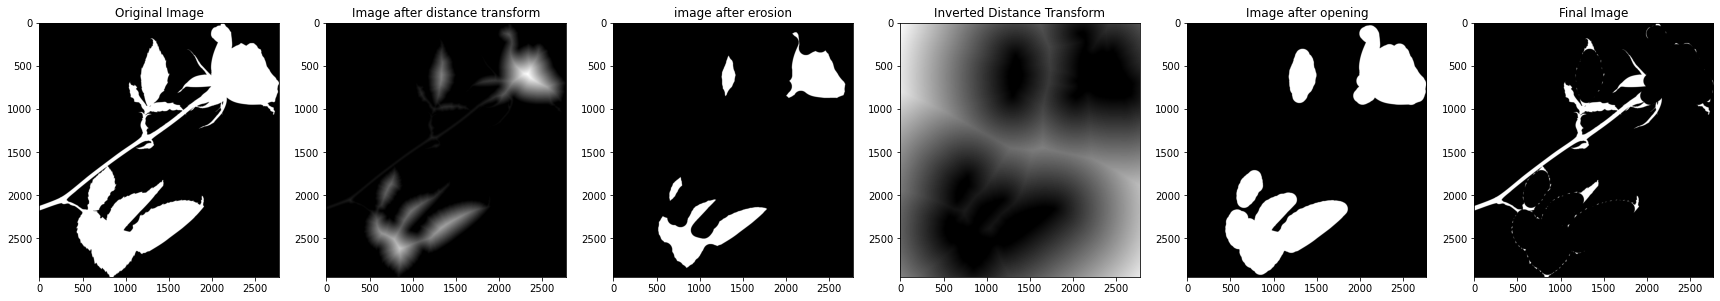

In [6]:
# %matplotlib inline
img_bin = imgs[6]
d = 80

img_dist = ndi.distance_transform_edt(img_bin)
img_eroded = img_dist>=d
img_dist_inv = ndi.distance_transform_edt(np.logical_not(img_eroded))
img_open = (img_dist_inv<=d)*img_bin
final_img = img_bin - img_open

plt.figure(figsize=(30, 25))

plt.subplot(1, 6, 1)
plt.imshow(img_bin, cmap='gray')
plt.title(f"Original Image")


plt.subplot(1, 6, 2)
plt.imshow(img_dist, cmap='gray')
plt.title(f"Image after distance transform")

plt.subplot(1, 6, 3)
plt.imshow(img_eroded, cmap='gray')
plt.title(f"image after erosion")

plt.subplot(1, 6, 4)
plt.imshow(img_dist_inv, cmap='gray')
plt.title(f"Inverted Distance Transform")


plt.subplot(1, 6, 5)
plt.imshow(img_open, cmap='gray')
plt.title(f"Image after opening")

plt.subplot(1, 6, 6)
plt.imshow(final_img, cmap='gray')
plt.title(f"Final Image")

